Build a recommender system by using cosine simillarties score.

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
book=pd.read_csv('book.csv',encoding ='latin1')
book

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


## EDA

In [4]:
# renmaing of columns
data=book.rename({'User.ID':'userid','Unnamed: 0':'index','Book.Title':'title','Book.Rating':'rating'},axis=1)
data

,index,userid,title,rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [5]:
# droping unwanted column
data=data.drop(['index'],axis=1)
data.head()

,userid,title,rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [6]:
data.sort_values('userid')

,userid,title,rating
2401,8,Wings,5
2400,8,The Western way: A practical guide to the West...,5
2399,8,Ancient Celtic Romances,5
2402,8,Truckers,5
2405,8,The Art Of Celtia,7
...,...,...,...
2395,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2398,278854,Celtic Mythology (Library of the World's Myths...,8
2393,278854,A corrente de Trewis Scott,7
2394,278854,As valkÃ­rias,7


In [7]:
#Number of Unique Users in dataset
len(data['userid'].unique())

2182

In [8]:
#Number of Unique Books in dataset
len(data['title'].unique())

9659

In [9]:
data['rating'].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: rating, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userid  10000 non-null  int64 
 1   title   10000 non-null  object
 2   rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [11]:
data.describe()

,userid,rating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


In [12]:
#checking null value
data.isnull().sum()

userid    0
title     0
rating    0
dtype: int64

In [13]:
#check for duplicate values
data[data.duplicated()]

,userid,title,rating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [14]:
# drop duplicate value
data1 = data.drop_duplicates()
data1

,userid,title,rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


### Visualization of data

<AxesSubplot:xlabel='rating', ylabel='count'>

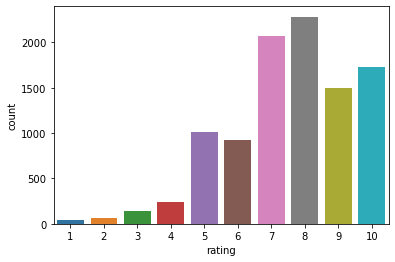

In [15]:
sns.countplot(x='rating', data=data1)

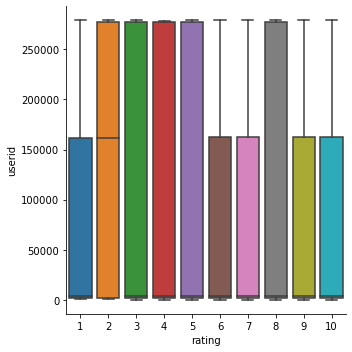

In [16]:
sns.catplot(x="rating",y="userid",data=data1,kind="box")
plt.show()

### As we observe that most of rating is given by users are 8,7 and 10

In [17]:
#creating pivot-table
user_books_df = data1.pivot_table(index='userid',columns = 'title', values = 'rating')
user_books_df

title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
userid,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [18]:
#Inpute those NaNs with 0 values
user_books_df.fillna(0, inplace=True)
user_books_df

title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
userid,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [19]:
#Calculating Cosine Similarity between Users
user_sim = 1 - pairwise_distances( user_books_df.values,metric='cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [20]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
#Set the index and column names to user ids 
user_sim_df.index = data1.userid.unique()
user_sim_df.columns = data1.userid.unique()
user_sim_df.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,1.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0
276744,0.0,0.0,0.0,0.0,1.0


In [22]:
#converting digonal values to zero so that value simalarity of him/her self should be ignord
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0


In [23]:
#Most Similar Users
user_sim_df.idxmax(axis=1)[0:10]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
276745    276726
276747    276726
276748    161677
276751    276726
276754    276726
dtype: int64

In [24]:
data1[(data1['userid']==276754) | (data1['userid']==276726)]

,userid,title,rating
0,276726,Classical Mythology,5
14,276754,A Second Chicken Soup for the Woman's Soul (Ch...,8


In [25]:
user_1=data1[data1['userid']==276726]
user_1

,userid,title,rating
0,276726,Classical Mythology,5


In [26]:
user_2=data1[data1['userid']==276754]
user_2

,userid,title,rating
14,276754,A Second Chicken Soup for the Woman's Soul (Ch...,8


In [27]:
pd.merge(user_1,user_2,on='title',how='outer')

,userid_x,title,rating_x,userid_y,rating_y
0,276726.0,Classical Mythology,5.0,NaN,NaN
1,NaN,A Second Chicken Soup for the Woman's Soul (Ch...,NaN,276754.0,8.0


### By observing the given values we Recommend  the book with title ' A Second Chicken Soup for the Woman's Soul ' to user_1 and he/she definatly like that book.